### build a simle workflow or graph using langagraph

In [1]:
from typing_extensions import TypedDict
class state(TypedDict):
    graph_info:str


In [2]:
def state_play(state:state):
    print("stat_play node has been called")
    return{"graph_info":state["graph_info"]+" iam palnning to play"}

def cricket(state:state):
    print("mycricket node has been caled")
    return{"graph_info":state["graph_info"]+" cricket"}

def batminton(state:state):
    print("mybatminton node has been caled")
    return{"graph_info":state["graph_info"]+" batminton"}


In [3]:
import random 
from typing import Literal

def random_play(state:state)-> Literal["cricket","batminton"]:
    graph_info = state["graph_info"]
     
    if random.random() > 0.5 :
        return "cricket"
    else:
        return "batminton"

In [4]:
from langgraph.graph import StateGraph, START, END

graph_builder = StateGraph(state)

In [5]:
graph_builder.add_node("state_play",state_play)
graph_builder.add_node("cricket",cricket)
graph_builder.add_node("batminton",batminton)
# graph_builder.add_node("random_play",random_play)

In [6]:
graph_builder.add_edge(START,"state_play")
graph_builder.add_conditional_edges("state_play",random_play)
# graph_builder.add_conditional_edges(
#     "random_play",
#     random_play,
#     {
#         "cricket": "cricket",
#         "batminton": "batminton"
#     }
# )
graph_builder.add_edge("batminton",END)
graph_builder.add_edge("cricket",END)

In [7]:
graph = graph_builder.compile()

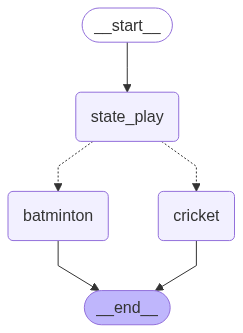

In [8]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [9]:
graph.invoke({"graph_info":"start"})

stat_play node has been called
mycricket node has been caled


{'graph_info': 'start iam palnning to play cricket'}

In [13]:
for event in graph.stream({"graph_info":"start"}):
    print(event)

stat_play node has been called
{'state_play': {'graph_info': 'start iam palnning to play'}}
mycricket node has been caled
{'cricket': {'graph_info': 'start iam palnning to play cricket'}}
